In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import scipy.optimize
import sklearn.decomposition
import sklearn.manifold
import sklearn.model_selection

census_original = pd.read_csv("data/census-income.csv")
census = census_original.copy()
numerical_columns = ['age','wage per hour','capital gains','capital losses','dividends from stocks',
                        'instance weight','num persons worked for employer','weeks worked in year']
census.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,48,Private,40,10,Some college but no degree,1200,NaN,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,NaN,2,52,95,0
1,47,Local government,43,26,Some college but no degree,876,NaN,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,95,0
2,56,Private,35,22,Some college but no degree,500,NaN,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,2,NaN,2,32,95,0
3,66,Private,37,36,Some college but no degree,400,NaN,Married-civilian spouse present,Business and repair services,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,95,0
4,42,Self-employed-incorporated,37,2,Some college but no degree,0,NaN,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,95,1


In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37382 entries, 0 to 37381
Data columns (total 42 columns):
age                                          37382 non-null int64
class of worker                              28594 non-null object
industry code                                37382 non-null int64
occupation code                              37382 non-null int64
education                                    37382 non-null object
wage per hour                                37382 non-null int64
enroll in edu inst last wk                   2097 non-null object
marital status                               37382 non-null object
major industry code                          37382 non-null object
major occupation code                        28563 non-null object
race                                         37382 non-null object
hispanic origin                              37262 non-null object
sex                                          37382 non-null object
member of a labor union  

In [7]:
# select the features
features = numerical_columns
X = (census[features].values)

# Fill in missing values
from sklearn.preprocessing import Imputer 
imputer = Imputer(strategy="median")
imputer.fit(X)

X = imputer.transform(X)

# rescale the features, so they have the same variance
for k in range(len(features)):
    X[:,k] = X[:,k] / np.std(X[:,k])

pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

# how the results are returned
print("μ:", pca.mean_)
k,i = 0,999
print(f"δ[k={k}]:", pca.components_[0])
print(f"λ[k={k},i={i}]:", pca_result[i,0])

/home/joe/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


μ: [2.13543135 0.51326564 0.17011031 0.20657205 0.13854901 1.7927064
 1.30535522 1.66225899]
δ[k=0]: [0.26357897 0.32528734 0.09091798 0.11940222 0.01719373 0.06032814
 0.61985306 0.64345814]
λ[k=0,i=999]: -0.003990508972367489


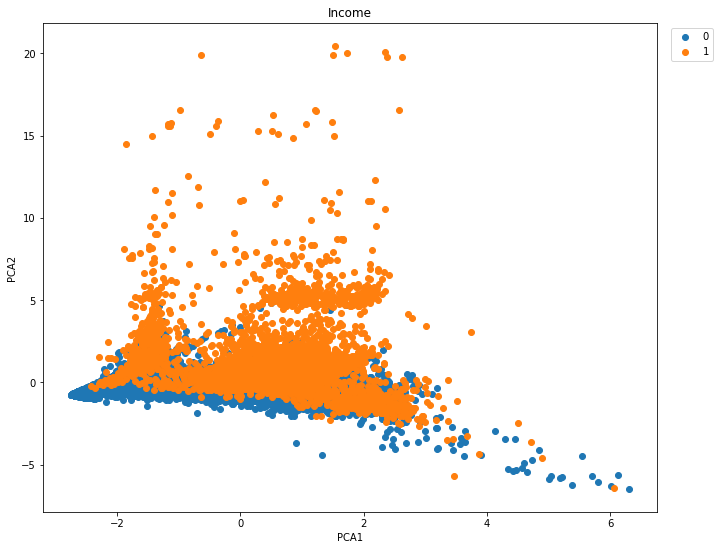

In [12]:
p1,p2 = pca_result[:,0], pca_result[:,1]

categorical_values = census['income'].tolist()
distinct_levels_for_category = set(categorical_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_category:
        i = [categorical_values[k] == lvl for k in range(len(categorical_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Income")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

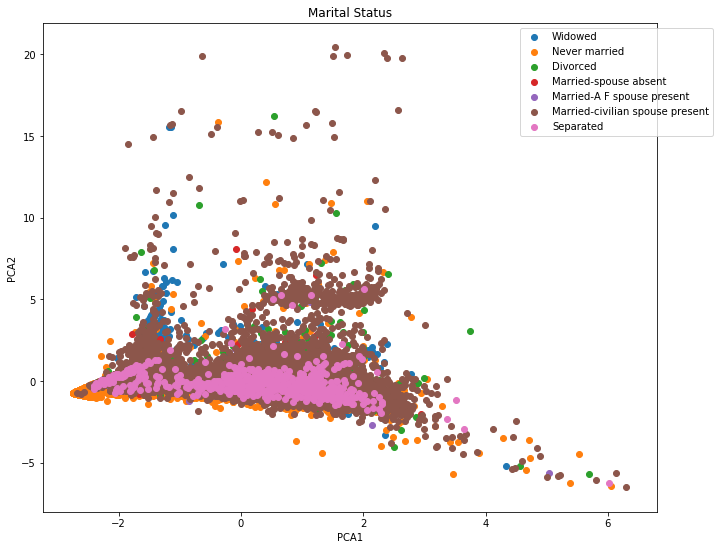

In [13]:
p1,p2 = pca_result[:,0], pca_result[:,1]

categorical_values = census['marital status'].tolist()
distinct_levels_for_category = set(categorical_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_category:
        i = [categorical_values[k] == lvl for k in range(len(categorical_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Marital Status")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

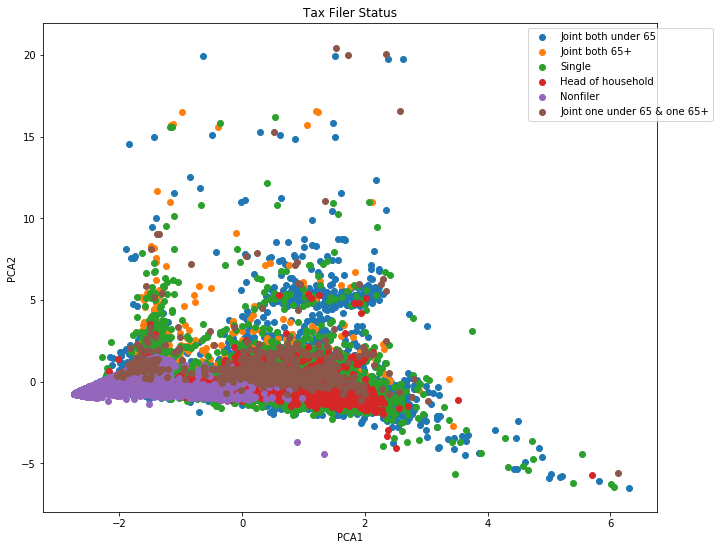

In [14]:
p1,p2 = pca_result[:,0], pca_result[:,1]

categorical_values = census['tax filer status'].tolist()
distinct_levels_for_category = set(categorical_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_category:
        i = [categorical_values[k] == lvl for k in range(len(categorical_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Tax Filer Status")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

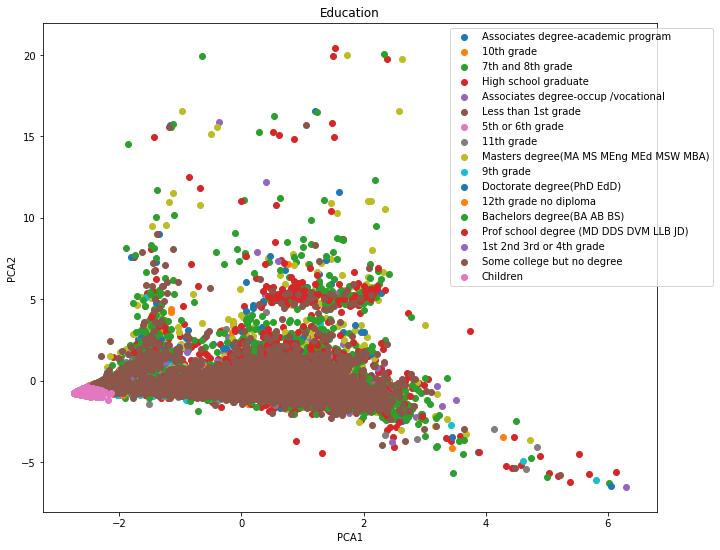

In [15]:
p1,p2 = pca_result[:,0], pca_result[:,1]

categorical_values = census['education'].tolist()
distinct_levels_for_category = set(categorical_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_category:
        i = [categorical_values[k] == lvl for k in range(len(categorical_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Education")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

/home/joe/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


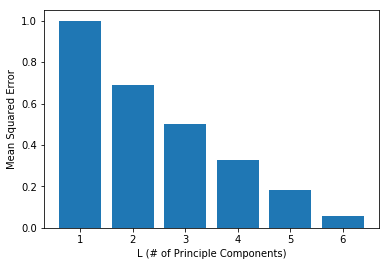

In [5]:
features = numerical_columns

X = (census[features].values)

# Fill in missing values
from sklearn.preprocessing import Imputer 
imputer = Imputer(strategy="median")
imputer.fit(X)

X = imputer.transform(X)

# rescale the features, so they have the same variance
for k in range(len(features)):
    X[:,k] = X[:,k] / np.std(X[:,k])


pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

from sklearn.metrics import mean_squared_error
x = [i+1 for i in range(len(features))]
MSEs = []
μ = pca.mean_
δ = pca.components_
λ = pca_result

def get_sum_term(i,λ,δ,features_count):
    return sum([λ[i,j]*δ[j] for j in range(features_count)])

for j in range(len(features)):
    preds = [(μ + get_sum_term(i,λ,δ,j)) for i in range(len(X))]
    mse = mean_squared_error(preds,X)
    MSEs.append(mse)
plt.bar(x,MSEs)
plt.xlabel("L (# of Principle Components)")
plt.ylabel("Mean Squared Error")
plt.show()

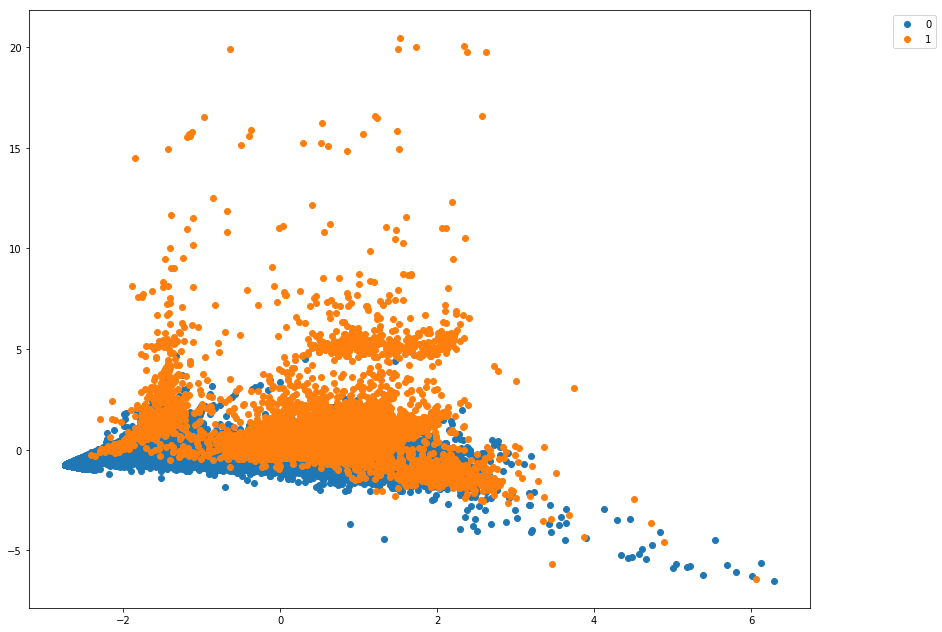

In [16]:
p1,p2 = pca_result[:,0], pca_result[:,1]

income_values = census['income'].tolist()
distinct_levels_for_income = set(income_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_income:
        i = [income_values[k] == lvl for k in range(len(income_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for big_set_index, small_set_index in split.split(census, census["income"]):
    big_set = census.loc[big_set_index]
    small_set = census.loc[small_set_index]

features = ['age','wage per hour','capital gains','capital losses','num persons worked for employer','weeks worked in year']

X = (small_set[features].values)
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3739 samples in 0.016s...
[t-SNE] Computed neighbors for 3739 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3739
[t-SNE] Computed conditional probabilities for sample 2000 / 3739
[t-SNE] Computed conditional probabilities for sample 3000 / 3739
[t-SNE] Computed conditional probabilities for sample 3739 / 3739
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.522320
[t-SNE] KL divergence after 1000 iterations: 0.303779


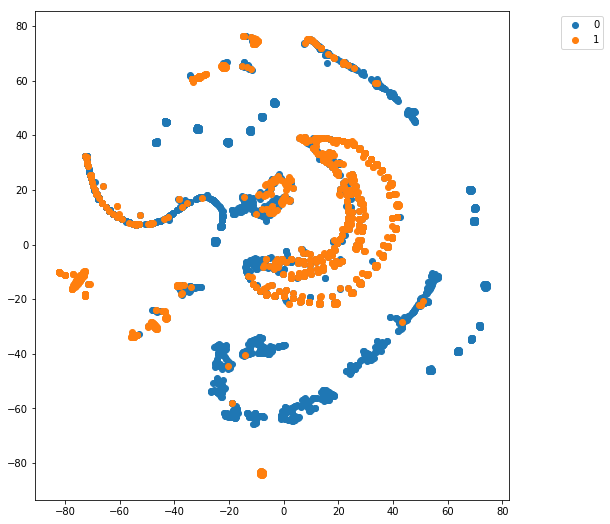

In [23]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['income'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

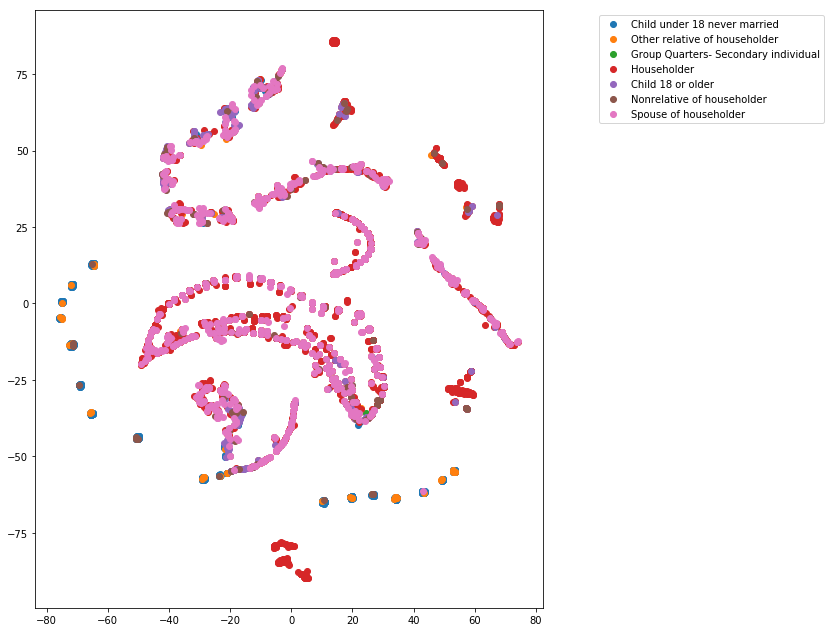

In [11]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['detailed household summary in household'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

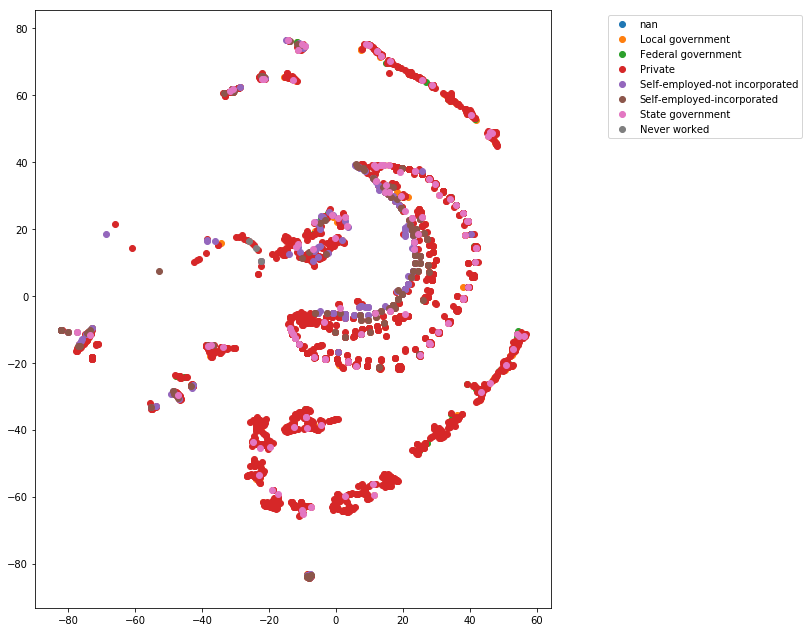

In [24]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['class of worker'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

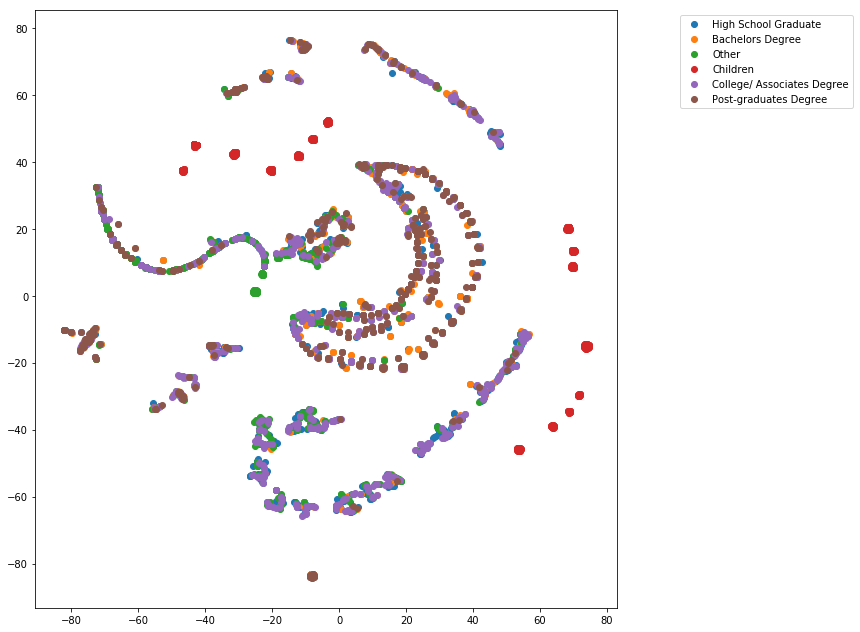

In [27]:
def reduce_education(education_data):
    education_class = []
    for item in education_data:
        class_ = str(item).lower()
        if class_ == "high school graduate":
            education_class.append("High School Graduate")
        elif class_ == "some college but no degree" or class_ == "associates degree-occup /vocational" or class_ == "associates degree-academic program":
            education_class.append("College/ Associates Degree")
        elif class_ == "bachelors degree(ba ab bs)":
            education_class.append("Bachelors Degree")
        elif class_ == "masters degree(ma ms meng med msw mba)" or class_ == "prof school degree (md dds dvm llb jd)" or class_ == "doctorate degree(phd edd)":
            education_class.append("Post-graduates Degree")
        elif class_ == "children":
            education_class.append("Children")
        else:
            education_class.append("Other")
    return education_class

small_set_copy = small_set.copy()
small_set_copy['education'] = reduce_education(small_set_copy['education'])

p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set_copy['education'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

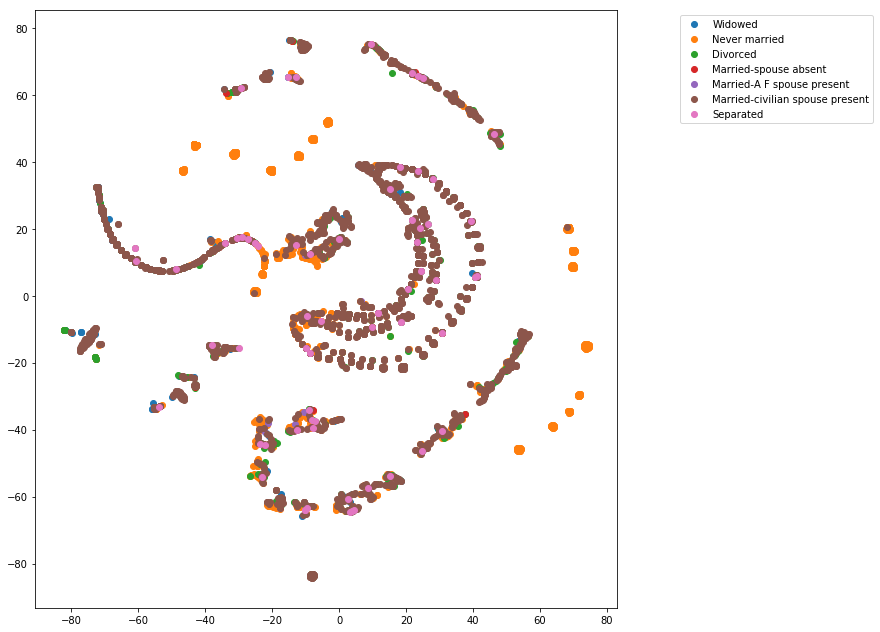

In [26]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['marital status'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

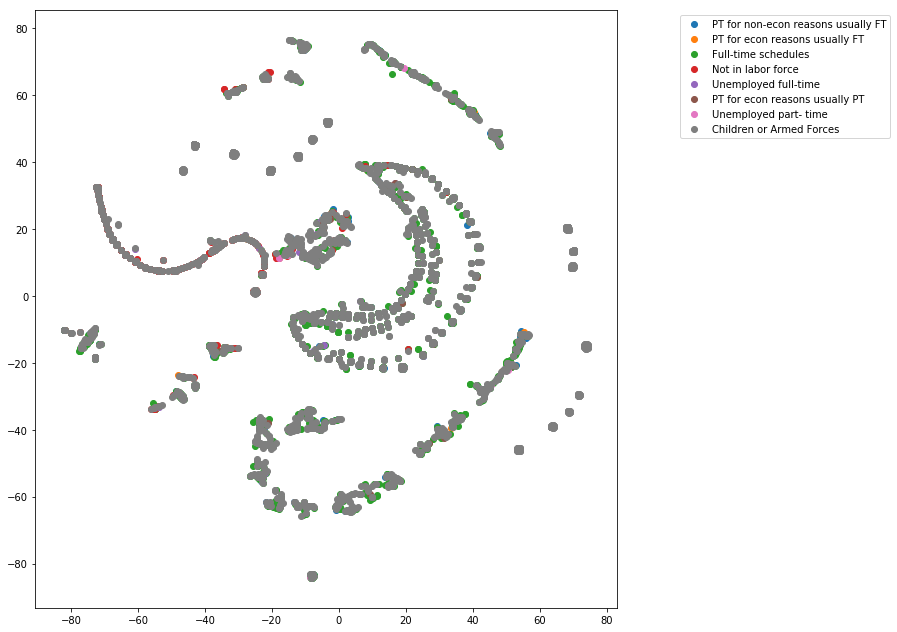

In [30]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['full or part time employment stat'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

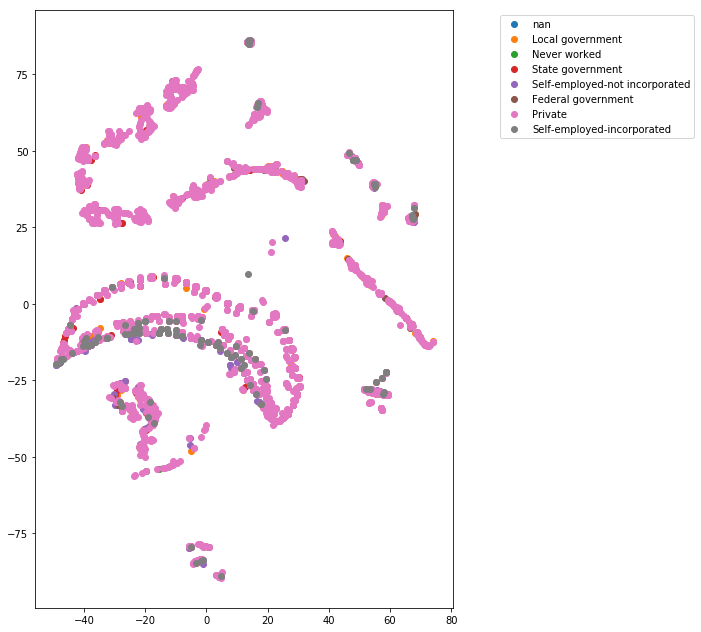

In [12]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['class of worker'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()